In [1]:
import glob
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from astroquery.simbad import Simbad
import arviz as az

plt.rcParams['figure.facecolor']    = 'white'
import pandas as pd    
from datetime import date
today=date.today()
DATE =today.strftime("%m_%d_%y")
print(DATE)
# from utils import *

04_10_25


In [37]:
harps_targets = pd.read_csv('../files/harps_targets.tsv',delimiter=';')
harps_rv = pd.read_csv('../files/harps_rv.tsv',delimiter=';')

harps_targets = harps_targets.replace(r'^\s*$', np.nan, regex=True)


Text(0, 0.5, 'V')

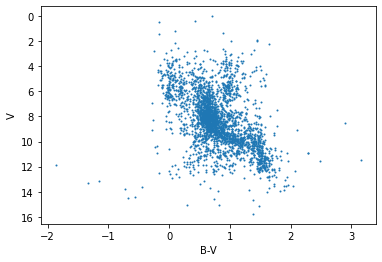

In [45]:
plt.scatter(harps_targets.Bmag.to_numpy().astype(float)-harps_targets.Vmag.to_numpy().astype(float), 
            harps_targets.Vmag.to_numpy().astype(float),s=1)
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V')

Text(1500, 100, '1 km/s')

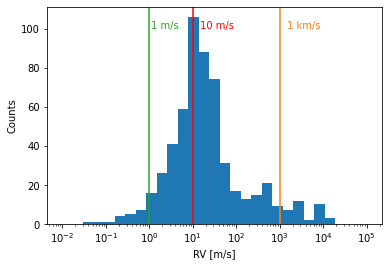

In [92]:
pp = pd.read_csv('../files/Wittenmyer2020_table2.tsv',delimiter=';')
pp = pp[pp.RV != 0.0]
bins=np.arange(-5, 5, 1)
bins=np.logspace(-2,5,30)
plt.hist(pp.RV,bins=bins)
plt.xlabel('RV [m/s]')
plt.ylabel('Counts')
plt.xscale('log')

plt.axvline(1,c='C2')
plt.text(1.1, 100, s='1 m/s',c='C2',ha='left')

plt.axvline(10,c='r')
plt.text(15, 100, s='10 m/s',c='r',ha='left')

plt.axvline(1000,c='C1')
plt.text(1500, 100, s='1 km/s',c='C1',ha='left')


In [127]:
data0 = pd.read_csv('binary_params.csv')

In [139]:
data0[data0.galah_id==170418005701333]

,index,RG_id,P,err_P,e,err_e,K,err_K,r_hat_P,r_hat_e,...,fe_h,ruwe_dr2,Ba_fe,e_Ba_fe,La_fe,e_La_fe,Zr_fe,e_Zr_fe,Y_fe,e_Y_fe
7,3,16.0,51.067,0.569,0.543,0.027,-18.309,1.116,1.01,1.02,...,-0.21,0.98,-0.21,0.17,NaN,NaN,NaN,NaN,NaN,NaN


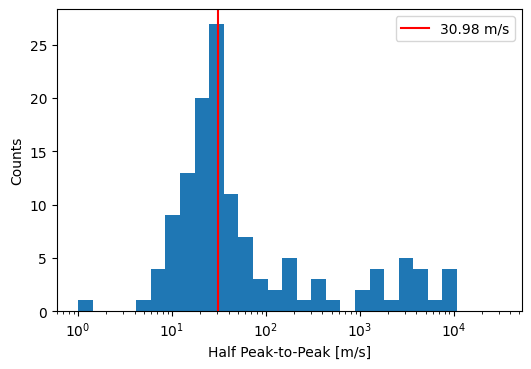

In [138]:

plt.figure(dpi=100)
semiK_dir = {}
objects = pp['Name'].unique()
for obj in objects:a
    RVS = pp[pp['Name']==obj]['RV'].tolist()
    semiK_dir[obj] = (max(RVS) - min(RVS))/2.
vals = list(semiK_dir.values())
bins=np.logspace(0,4.5,30)
_ = plt.hist(np.array(vals) , bins=bins)
plt.xlabel('Half Peak-to-Peak [m/s]')
plt.ylabel('Counts')
plt.xscale('log')
median = np.median(np.array(vals))
plt.axvline(median,c='r',label='%.2f m/s' % median)
plt.legend()

In [104]:
len(semiK_dir)

129

In [61]:
pan_pacific.RV.tolist()

[-97.9,
 -8.99,
 12.65,
 14.99,
 0.0,
 -209.69,
 -9.8,
 11.14,
 108.65,
 115.52,
 -2349.28,
 -2436.01,
 -745.01,
 -2479.11,
 -2265.11,
 -66.31,
 543.43,
 596.7,
 0.0,
 683.32,
 708.76,
 609.39,
 -37.08,
 -32.98,
 7.32,
 -18.26,
 2.89,
 5.62,
 -941.9,
 0.0,
 13693.46,
 -1166.58,
 -563.09,
 -367.27,
 -244.89,
 0.0,
 119.44,
 339.56,
 374.78,
 659.52,
 -112.01,
 1436.21,
 698.54,
 542.12,
 486.79,
 0.0,
 -62.56,
 -66.8,
 -897.19,
 -1.27,
 12.49,
 7.78,
 -11.32,
 0.0,
 11.64,
 -1.56,
 -2.37,
 11.27,
 -19.79,
 -16.22,
 17.97,
 13.77,
 -7.92,
 -12.29,
 -3.29,
 0.0,
 -17.73,
 7.64,
 -34.85,
 -0.33,
 8.17,
 9.51,
 19.17,
 -5.44,
 0.0,
 -6.75,
 4.72,
 -7.05,
 -1.89,
 -5.02,
 17.23,
 1.83,
 -3.58,
 17.43,
 36.72,
 -17.52,
 -23.87,
 49.27,
 -17.86,
 -29.27,
 0.0,
 3814.22,
 -1508.14,
 0.0,
 417.78,
 -1400.22,
 12.18,
 -30.44,
 22.03,
 -67.56,
 -50.62,
 -34.91,
 -14.01,
 0.0,
 -53.12,
 -94.16,
 -83.61,
 11.37,
 44.34,
 0.0,
 -0.57,
 3.31,
 8.85,
 -9.24,
 -11.57,
 8.8,
 -32.26,
 -0.83,
 13.32,
 0.0

In [50]:
pan_pacific[abs(pan_pacific.RV) > 5000]

,Name,BJD,RV,e_RV
30,HD104819,2.456376e+06,13693.46,0.99
162,HD11653,2.455879e+06,7028.12,0.45
281,HD133166,2.455971e+06,14359.20,1.64
596,HD181809,2.456089e+06,-7245.37,2.40
598,HD181809,2.456527e+06,11753.00,4.97
600,HD188981,2.455318e+06,-8926.48,2.48
601,HD188981,2.455456e+06,7190.76,1.88
603,HD188981,2.455707e+06,6601.14,1.50
604,HD188981,2.455760e+06,-8824.89,6.08
605,HD188981,2.455843e+06,6847.55,1.98


In [60]:

pan_pacific[pan_pacific.RV==np.inf]

,Name,BJD,RV,e_RV
